<a href="https://colab.research.google.com/github/MINJILEE-PURDUE/machinelearning/blob/main/chapter3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chapter3-2: Linear Regression

What is linear regression? It is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. **The goal of linear regression is to find the linear relationship that best describes the data.** In simple linear regression, there is one dependent variable (output) and one independent variable (input), whereas there are multiple independent variables in multiple linear regression. We will talk about linear regression first.

In [22]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [23]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


<function matplotlib.pyplot.show(close=None, block=None)>

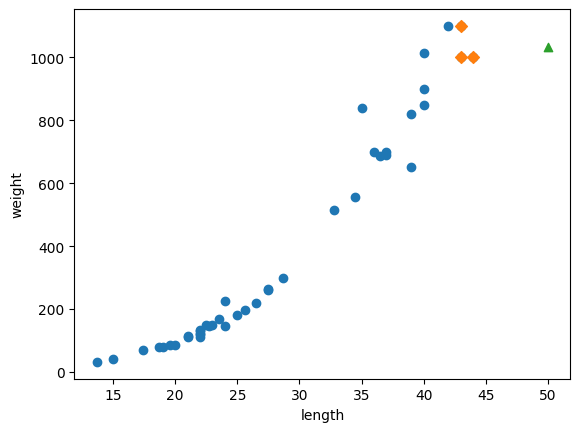

In [25]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [26]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


k-NN Regression identifies the nearest neighbors of a new sample in the training dataset and computes the mean of their target values. This mean serves as the prediction for the new sample. The strength of the prediction heavily relies on the availability of similar samples in the training set. If the new sample falls outside the range or characteristics of the training data, the prediction may not be as robust.

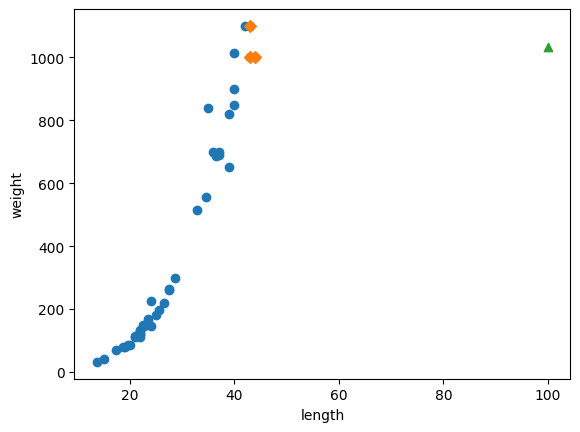

In [27]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

Although the perch has a length of 100cm, it also weighs in at 1000g. Instead of using knn algorithm, we need to find another one. Let's talk about linear regression. The goal of linear regression is to find the linear relationship that best describes the data.

Saving IMG_0035.jpg to IMG_0035 (1).jpg


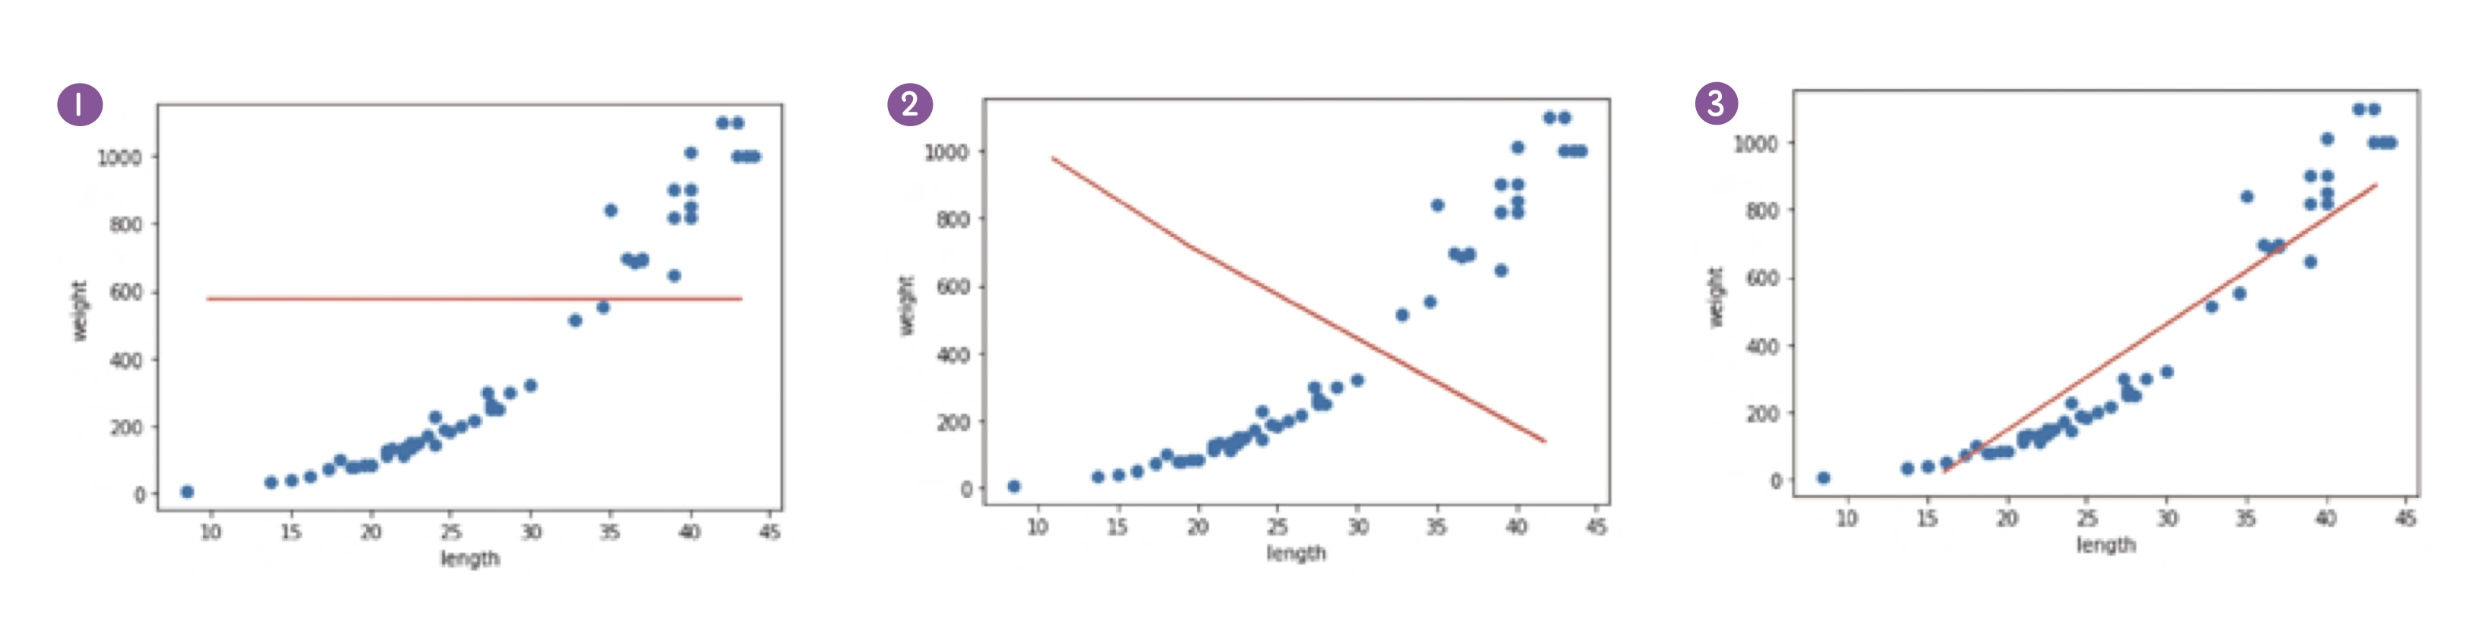

In [28]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('IMG_0035.jpg')

Graph 1 predicts the weight of all perches collectively. If the position of the red line is close to the average of the training set, the $R^2$ value will be close to 0. It means that $x$ and $y$ does not have any correlation coefficient.
Graph 2 predicts completely in the opposite direction. Graph 3 looks the best option among the three.

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


Compared to knn, this regression shows better prediction. To draw a linear line, you need both slope and intercept, expressed as

> $y = a*x + b$.

LinearRegression class finds the best $a$ and $b$ given the dataset.

In [30]:
print(lr.coef_, lr.intercept_) # coef: coefficient or weight

[39.01714496] -709.0186449535477


*coef_* and *intercept_* are called model parameters, representing the values that a ML algorithm has found. *coef_* corresponds to the slope, and *intercept_* corresponds to the y-intercept. Typically, ML models are employed to find a linear equation that relates input variables to the output.
> *coef_* represents the slope, while *intercept_* represents the y-intercept in this context.
In knn algorithm, there is no model parameter as the algorithm only stores the training set. It is called **instance-based learning**, not model-based learning.

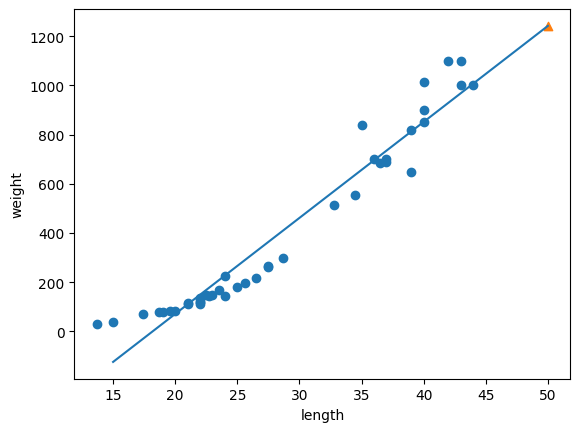

In [31]:
plt.scatter(train_input, train_target)
plt.plot([15, 50],[15*lr.coef_+lr.intercept_,50 * lr.coef_+lr.intercept_,])

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


The overall scores looks underfitting problem. When you closely examine the scatter plot of perch length and weight, it appears to be more like a curved line rather than a linear line. To represent this relationship, a graph with a quadratic equation should be drawn, and in this case, the squared term of the length needs to be added to the training set.

### Polynomial Regression


One of the challenges of knn regressor is that if new data falls outside the range or distribution of the training set, the prediction accuracy may be poor. This is because knn relies on the assumption that similar data points in the feature space have similar output values.

If a new data point is too far away from the data points in the training set, the knn algorithm may not capture the underlying patterns effectively. Even if the new data point is significantly distant, **knn still considers it as one of the k neighbors when calculating the prediction**, which can lead to inaccurate results. This sensitivity to the local distribution of data points is a limitation of knn, and it may struggle with extrapolation beyond the range covered by the training data.

Let's use polynomial regression.

In [33]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [34]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [35]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [39]:
print(lr.coef_)
print(lr.intercept_)

[  1.01433211 -21.55792498]
116.0502107827827


This model learns:

> Weight = *1.01* * $length^2$ - *21.6* * $length$ + *116.05*

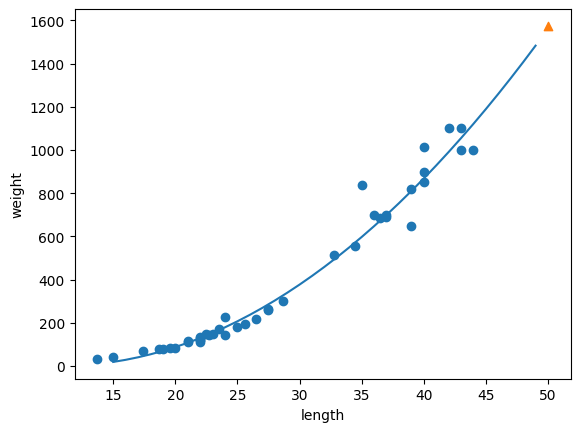

In [42]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05)

plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
